<a href="https://colab.research.google.com/github/Hwarriach/Portugal_Banking_Logistic_Regression/blob/main/Portugal_Banking_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Dependencies

from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Logistic Regression/Project Logistic Regression /portu_banking_final.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn import preprocessing
from numpy import asarray
from sklearn.preprocessing import StandardScaler
b_encoder = preprocessing.LabelBinarizer()
l_encoder = preprocessing.LabelEncoder()
o_encoder = OrdinalEncoder()

# **Data Exploration**

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999.0,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999.0,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6.0,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999.0,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3.0,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [ ]:
df.job.unique()

array(['blue-collar', 'technician', 'management', 'services', 'retired',
       'admin.', 'housemaid', 'unemployed', 'entrepreneur',
       'self-employed', 'unknown', 'student', 'MANAGEMENT', 'RETIRED',
       'STUDENT', 'ADMIN.', 'TECHNICIAN', 'BLUE-COLLAR', 'HOUSEMAID',
       'SERVICES', 'UNKNOWN'], dtype=object)

In [ ]:
df.education.unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'basic-6y',
       'basic-9y', 'basic-4y', 'illiterate'], dtype=object)

In [ ]:
df.describe()

,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,258.285010,2.567593,963.568005,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,259.279249,2.770014,211.772296,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,4918.000000,56.000000,9999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  object 
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  float64
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [ ]:
df['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [ ]:
y_mean = df.groupby(df.y).mean()
y_mean

,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,
0,220.844807,2.633085,985.345135,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


Duration is highly correlated and to create a true predicative model we must elimate this column as we don't know the duration of a call before it is placed.

In [ ]:
marital_mean = df.groupby(df.marital).mean()
marital_mean

,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,
D,87.500000,1.250000,999.000000,0.000000,1.250000,93.974250,-37.675000,4.909750,5209.550000,0.000000
M,418.400000,2.600000,999.000000,0.200000,-0.960000,92.931400,-37.560000,2.589200,5141.540000,0.000000
S,283.333333,2.000000,999.000000,0.000000,-0.233333,93.396333,-34.733333,3.531333,5152.733333,0.000000
divorced,253.934679,2.614583,968.613498,0.168837,0.163043,93.606244,-40.709701,3.714567,5170.845074,0.103299
married,257.406332,2.572804,967.963528,0.155599,0.183854,93.597501,-40.271203,3.746064,5171.854853,0.101593
single,261.518720,2.533939,952.231474,0.211414,-0.167972,93.517331,-40.920303,3.317391,5155.199905,0.140078
unknown,312.725000,3.187500,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313038,5157.393750,0.150000


In [ ]:
job_mean = df.groupby(df.job).mean()
job_mean

,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,
ADMIN.,637.000000,1.500000,999.000000,0.000000,1.100000,93.994000,-36.400000,4.858500,5191.000000,0.000000
BLUE-COLLAR,5.000000,7.000000,999.000000,1.000000,-1.800000,92.893000,-46.200000,1.281000,5099.100000,0.000000
HOUSEMAID,84.000000,1.000000,999.000000,0.000000,-0.100000,93.200000,-42.000000,4.153000,5195.800000,0.000000
MANAGEMENT,1225.000000,2.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.884000,5076.200000,0.000000
RETIRED,545.000000,1.666667,668.000000,1.000000,-1.566667,93.142667,-37.233333,1.976667,5087.866667,0.333333
SERVICES,238.333333,2.000000,999.000000,0.000000,1.200000,94.151000,-38.200000,4.892000,5203.366667,0.000000
STUDENT,638.500000,1.500000,505.500000,0.500000,-1.750000,94.045500,-40.150000,0.752500,5000.150000,1.000000
TECHNICIAN,834.000000,9.000000,999.000000,0.000000,1.100000,93.994000,-36.400000,4.855000,5191.000000,0.000000
UNKNOWN,54.000000,4.000000,999.000000,0.000000,1.100000,93.994000,-36.400000,4.864000,5191.000000,0.000000


In [ ]:
edu_mean = df.groupby(df.education).mean()
edu_mean

,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,
basic-4y,259.750000,4.250000,915.916667,0.250000,0.166667,93.747500,-42.225000,3.615083,5167.266667,0.083333
basic-6y,222.500000,2.500000,999.000000,0.000000,0.766667,93.784667,-39.933333,4.313333,5194.233333,0.000000
basic-9y,144.900000,1.600000,999.000000,0.200000,0.270000,93.732300,-42.120000,3.716900,5161.490000,0.000000
basic.4y,264.842459,2.595821,970.171230,0.146734,0.216066,93.658052,-40.234150,3.752162,5170.133117,0.102546
basic.6y,264.524497,2.556430,980.319335,0.129484,0.229746,93.649709,-41.131015,3.771524,5174.666842,0.082240
basic.9y,261.484673,2.533886,979.100249,0.141342,0.159056,93.623218,-41.325435,3.697932,5172.311914,0.078376
high.school,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735,0.108355
illiterate,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222
professional.course,252.533855,2.586115,962.482548,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979,0.113485


In [ ]:
bardf = df[['education','housing', 'job', 'y']]


In [ ]:
def eda(data,target):
    ind_var=data.drop(target,axis=1)
    for col in ind_var.columns:
        #sns.countplot(x=col,hue=target,data = data)
            pd.crosstab(ind_var[col],data[target]).plot(kind="bar",stacked=False)

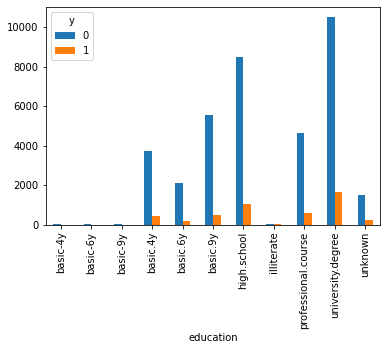

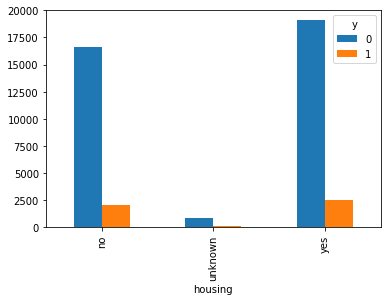

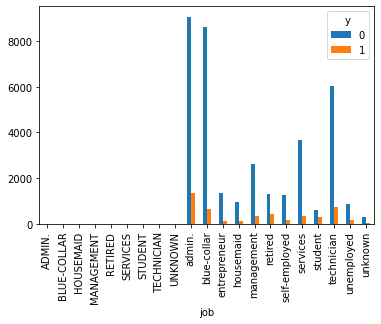

In [ ]:
eda(bardf,'y')

# **Variable Encoding**

In [ ]:
X = df.drop(['y', 'day_of_week'], axis=1)
y = df['y']

In [ ]:
# Replacing string values in 'age' column to a numerical value and converting dtype to integer

X['age'].unique()

array(['44', '53', '28', '39', '55', '30', '37', '36', '27', '34', '41',
       '33', '26', '52', '35', '40', '32', '49', '38', '47', '46', '29',
       '54', '42', '72', '48', '43', '56', '31', '24', '68', '59', '50',
       '45', '35-30', '25', '57', '63', '58', '60', '30-35', '64', '51',
       '23', '20', '74', '80', '61', '25-30', '62', '75', '21', '82',
       '77', '18-25', '30-32', '70', '50-55', '76', '73', '66', '22',
       '71', '19', '79', '88', '65', '67', '81', '18', '84', '69', '98',
       '85', '83', '78', '92', '45-50', '20-25', '20-40', '35-40', '86',
       '94', '17', '91', '89', '87', '95', '30-40', 56, 39, 30, 53, 37,
       22, 45, 31, 24, 50, 58, 33, 27, 28, 32, 51, 41, 49, 43, 44, 35, 29,
       26, 57, 25, 42, 48, 46, 67, 38, 34, 54, 40, 23, 47, 62, 75, 55, 36,
       52, 59, 78, 70, 60, 20, 66, 61, 21, 88, 18, 68, 71, 73, 80, 79, 63,
       76, 83, 65, 19, 86, 17, 72, 69, 81, 64, 77, 74, 85, 82],
      dtype=object)

In [ ]:
X.age.replace(['35-30','30-35','25-30','30-32','50-55','45-50','20-25','20-40','35-40','30-40','18-25'], [33,33,28,31,53,48,23,30,38,35,21], inplace=True)


In [ ]:
X['age'].unique()

array(['44', '53', '28', '39', '55', '30', '37', '36', '27', '34', '41',
       '33', '26', '52', '35', '40', '32', '49', '38', '47', '46', '29',
       '54', '42', '72', '48', '43', '56', '31', '24', '68', '59', '50',
       '45', 33, '25', '57', '63', '58', '60', '64', '51', '23', '20',
       '74', '80', '61', 28, '62', '75', '21', '82', '77', 21, 31, '70',
       53, '76', '73', '66', '22', '71', '19', '79', '88', '65', '67',
       '81', '18', '84', '69', '98', '85', '83', '78', '92', 48, 23, 30,
       38, '86', '94', '17', '91', '89', '87', '95', 35, 56, 39, 37, 22,
       45, 24, 50, 58, 27, 32, 51, 41, 49, 43, 44, 29, 26, 57, 25, 42, 46,
       67, 34, 54, 40, 47, 62, 75, 55, 36, 52, 59, 78, 70, 60, 20, 66, 61,
       88, 18, 68, 71, 73, 80, 79, 63, 76, 83, 65, 19, 86, 17, 72, 69, 81,
       64, 77, 74, 85, 82], dtype=object)

In [ ]:
X['age'] = pd.to_numeric(X['age'])


In [ ]:
# Eliminating duplicates and "unknowns"

X.job.replace(['unknown', 'UNKNOWN','RETIRED','SERVICES','STUDENT','ADMIN.','MANAGEMENT','TECHNICIAN','BLUE-COLLAR','HOUSEMAID'], ['admin.', 'admin.','retired','services','student','admin.','management','technician','blue-collar','housemaid'], inplace=True)

In [ ]:
X['job'].value_counts()

admin.           10752
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: job, dtype: int64

In [ ]:
X.education.replace(['unknown','basic-4y','basic-9y','basic-6y', 'basic.9y'], ['university.degree','basic.4y','basic.9y','basic.6y','basic.9y'], inplace=True)

In [ ]:
X['education'].value_counts()

university.degree      13899
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
illiterate                18
Name: education, dtype: int64

In [ ]:
X.marital.replace(['unknown','M','D','S'], ['married','married','divorced','single'], inplace=True)

In [ ]:
X['marital'].value_counts()

married     25008
single      11568
divorced     4612
Name: marital, dtype: int64

In [ ]:
#One Hot Encoding

oh_list = ['job', 'marital', 'contact', 'poutcome']

In [ ]:
for a in oh_list:
    if a == 'contact':
        d = pd.get_dummies(X[a], prefix='ct')
        X = pd.concat([X,d], axis=1)
        del X[a]
    elif a == 'poutcome':
        d = pd.get_dummies(X[a], prefix='pc')
        X = pd.concat([X,d], axis=1)
        del X[a]
    else:
        d = pd.get_dummies(X[a], drop_first=True)
        X = pd.concat([X,d], axis=1)
        del X[a]
X.head()

,age,education,default,housing,loan,month,duration,campaign,pdays,previous,...,student,technician,unemployed,married,single,ct_cellular,ct_telephone,pc_failure,pc_nonexistent,pc_success
0,44,basic.4y,unknown,yes,no,aug,210,1,999.0,0,...,0,0,0,1,0,1,0,0,1,0
1,53,university.degree,no,no,no,nov,138,1,999.0,0,...,0,1,0,1,0,1,0,0,1,0
2,28,university.degree,no,yes,no,jun,339,3,6.0,2,...,0,0,0,0,1,1,0,0,0,1
3,39,high.school,no,no,no,apr,185,2,999.0,0,...,0,0,0,1,0,1,0,0,1,0
4,55,basic.4y,no,yes,no,aug,137,1,3.0,1,...,0,0,0,1,0,1,0,0,0,1


In [ ]:
# Ordinal Encoding

a = o_encoder.fit_transform(asarray(X['education']).reshape(-1,1))
X['education'] = a
X.head()

,age,education,default,housing,loan,month,duration,campaign,pdays,previous,...,student,technician,unemployed,married,single,ct_cellular,ct_telephone,pc_failure,pc_nonexistent,pc_success
0,44,0.0,unknown,yes,no,aug,210,1,999.0,0,...,0,0,0,1,0,1,0,0,1,0
1,53,6.0,no,no,no,nov,138,1,999.0,0,...,0,1,0,1,0,1,0,0,1,0
2,28,6.0,no,yes,no,jun,339,3,6.0,2,...,0,0,0,0,1,1,0,0,0,1
3,39,3.0,no,no,no,apr,185,2,999.0,0,...,0,0,0,1,0,1,0,0,1,0
4,55,0.0,no,yes,no,aug,137,1,3.0,1,...,0,0,0,1,0,1,0,0,0,1


In [ ]:
a = o_encoder.fit_transform(asarray(X['month']).reshape(-1,1))
X['month'] = a
X.head()

,age,education,default,housing,loan,month,duration,campaign,pdays,previous,...,student,technician,unemployed,married,single,ct_cellular,ct_telephone,pc_failure,pc_nonexistent,pc_success
0,44,0.0,unknown,yes,no,1.0,210,1,999.0,0,...,0,0,0,1,0,1,0,0,1,0
1,53,6.0,no,no,no,7.0,138,1,999.0,0,...,0,1,0,1,0,1,0,0,1,0
2,28,6.0,no,yes,no,4.0,339,3,6.0,2,...,0,0,0,0,1,1,0,0,0,1
3,39,3.0,no,no,no,0.0,185,2,999.0,0,...,0,0,0,1,0,1,0,0,1,0
4,55,0.0,no,yes,no,1.0,137,1,3.0,1,...,0,0,0,1,0,1,0,0,0,1


In [ ]:
# Binary Encoding

b_list = ['loan', 'housing', 'default']

In [ ]:
for l in b_list:
    a = b_encoder.fit_transform(X[l])
    X[l] = a

In [ ]:
# Veryfing Data types of all columns have been converted to a numerical format

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 32 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   education       41188 non-null  float64
 2   default         41188 non-null  int64  
 3   housing         41188 non-null  int64  
 4   loan            41188 non-null  int64  
 5   month           41188 non-null  float64
 6   duration        41188 non-null  int64  
 7   campaign        41188 non-null  int64  
 8   pdays           41188 non-null  float64
 9   previous        41188 non-null  int64  
 10  emp_var_rate    41188 non-null  float64
 11  cons_price_idx  41188 non-null  float64
 12  cons_conf_idx   41188 non-null  float64
 13  euribor3m       41188 non-null  float64
 14  nr_employed     41188 non-null  float64
 15  blue-collar     41188 non-null  uint8  
 16  entrepreneur    41188 non-null  uint8  
 17  housemaid       41188 non-null 

# **Machine Learning**

Logistic Regression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [ ]:
y_train.value_counts()

0    29278
1     3672
Name: y, dtype: int64

In [ ]:
model1 = LogisticRegression(max_iter=1000)
model1.fit(X_train, y_train)
pred1 = model1.predict(X_test)
acc1 = accuracy_score(pred1, y_test)
print(classification_report(pred1, y_test))
print(acc1)

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      7649
           1       0.42      0.69      0.52       589

    accuracy                           0.91      8238
   macro avg       0.70      0.81      0.74      8238
weighted avg       0.94      0.91      0.92      8238

0.9095654285020636


Recall score for "1" is low - indicating data imbalance

**SMOTE**

Validating with balanced data

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(random_state=12)
X_sm, y_sm = smote.fit_resample(X,y)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=41)

In [ ]:
y_train.value_counts()

1    29275
0    29201
Name: y, dtype: int64

In [ ]:
model1 = LogisticRegression()
model1.fit(X_sm, y_sm)
pred1 = model1.predict(X_test)
acc1 = accuracy_score(pred1, y_test)
print(classification_report(pred1, y_test))
print(acc1)

              precision    recall  f1-score   support

           0       0.86      0.87      0.86      7223
           1       0.87      0.86      0.86      7397

    accuracy                           0.86     14620
   macro avg       0.86      0.86      0.86     14620
weighted avg       0.86      0.86      0.86     14620

0.8636114911080711


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


**RFE**

Feature Elimination 

In [ ]:
from sklearn.feature_selection import RFE
rfe = RFE(model1, n_features_to_select  = 20)
rfe = rfe.fit(X_train,y_train)
rfe.ranking_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


array([12,  7, 11,  1,  1,  8, 10,  2, 13,  3,  6,  4,  5,  1,  9,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [ ]:
pred1 = rfe.predict(X_test)

In [ ]:
pred1
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      7347
           1       0.87      0.83      0.85      7273

    accuracy                           0.86     14620
   macro avg       0.86      0.86      0.86     14620
weighted avg       0.86      0.86      0.86     14620



Confusion Matrix

The accuracy of the Model 0.8555403556771546
Confusion matrix, without normalization
[[6288 1059]
 [ 935 6338]]
Normalized confusion matrix
[[0.85585953 0.14414047]
 [0.12855768 0.87144232]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


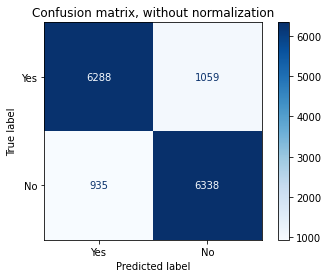

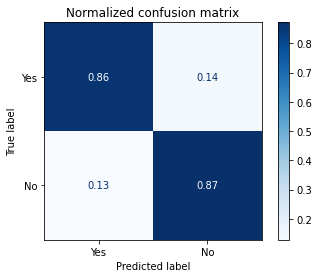

In [ ]:
from sklearn.metrics import plot_confusion_matrix

print( "The accuracy of the Model",accuracy_score(y_test, pred1))

class_names = ['Yes','No']

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model1, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()